In [60]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans 
# from sklearn.mixture import GaussianMixture as GMM
from collections import defaultdict
from sklearn.metrics import adjusted_mutual_info_score as ami
from sklearn.metrics import homogeneity_score, completeness_score, silhouette_score
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import SparseRandomProjection
from itertools import product
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

In [4]:
from tqdm import tqdm
plt.style.use('seaborn-darkgrid')
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Scaling
from sklearn.preprocessing import RobustScaler, StandardScaler

# Train Test Split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

# Metrics
from sklearn.metrics import accuracy_score, classification_report, roc_curve,confusion_matrix

# Cross Validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import log_loss, classification_report
from sklearn.model_selection import train_test_split

In [6]:
import os
save_folder = "../figures/clustering/"
os.path.isdir(save_folder)

True

## Prepare the dataset : Heart Disease

In [8]:
filename = '../datasets/heart.csv'
df = pd.read_csv(filename)

In [105]:
# creating a copy of df
df1_copy = df

# define the columns to be encoded and scaled (defined before)
categorial_features = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
continuous_features = ["age","trtbps","chol","thalachh","oldpeak"]

# encoding the categorical columns (one hot encoding)
df1_copy = pd.get_dummies(df1_copy, columns = categorial_features, drop_first = True)

# seperate features with target
x = df1_copy.drop(['output'],axis=1)
y = df1_copy[['output']]
# instantiating the scaler
scaler = RobustScaler()
# scaler = StandardScaler()

# scaling the continuous featuree
x[continuous_features] = scaler.fit_transform(x[continuous_features])
x = x.values
y = y.squeeze()

## Digists 

In [112]:
from sklearn import datasets
digits = datasets.load_digits()
# flatten the images
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
y_data = digits.target

## Experiments 

## KMean

distortion


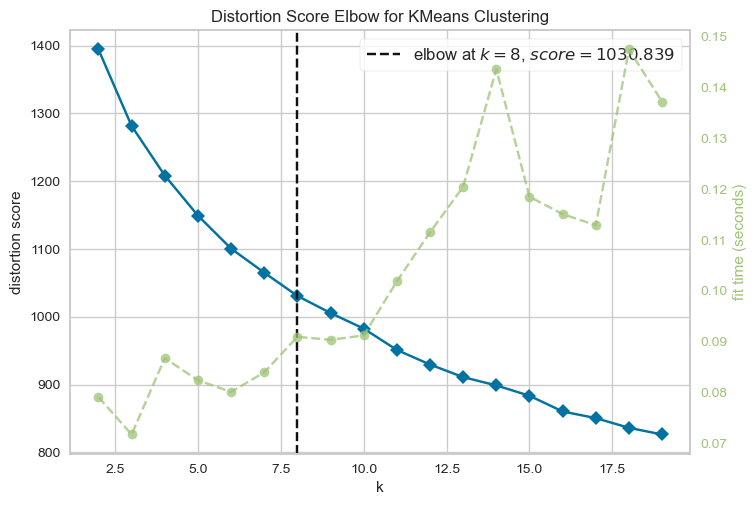

silhouette


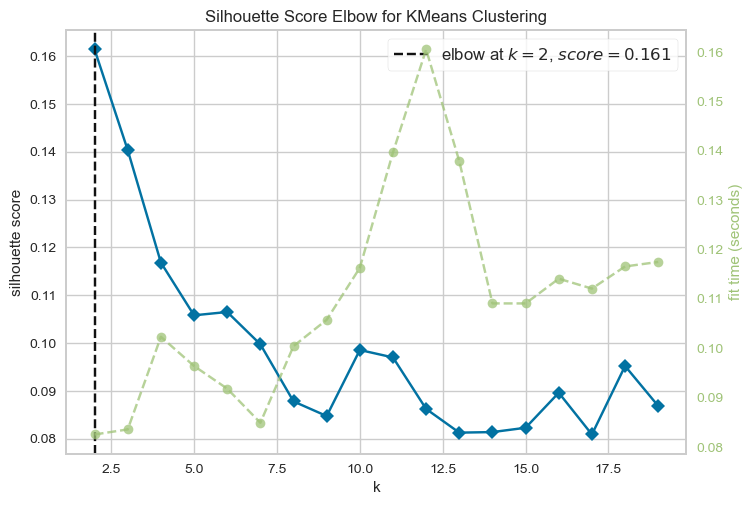

calinski_harabasz


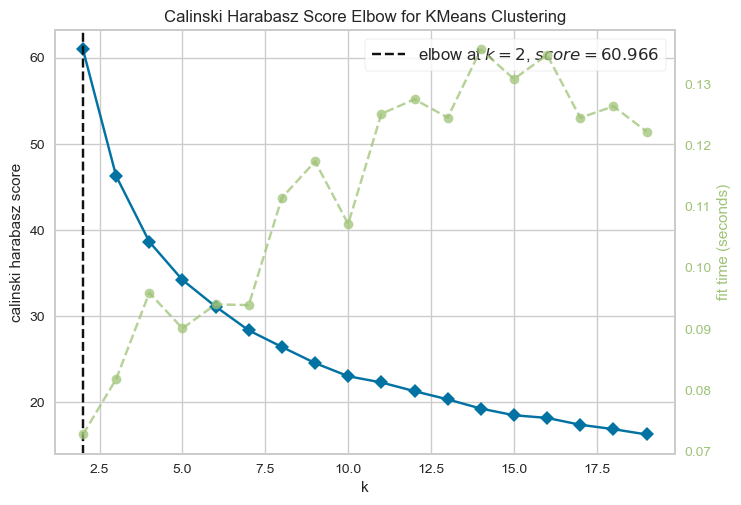

In [77]:
kmeans = KMeans(random_state=42)
methods = ['distortion', 'silhouette', 'calinski_harabasz']
for i in methods:
    print(i)
    visualizer = KElbowVisualizer(kmeans, k=(2,20), metric = i, timings = True)
    visualizer.fit(x)
    visualizer.show() #use to only show
#     visualizer.show(outpath=save_folder+"heart_elbow_{}.png".format(i))
#     plt.close()

distortion


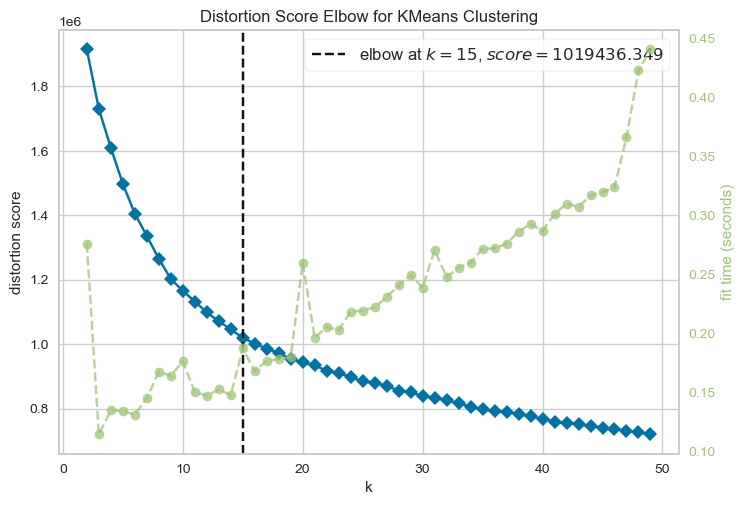

silhouette


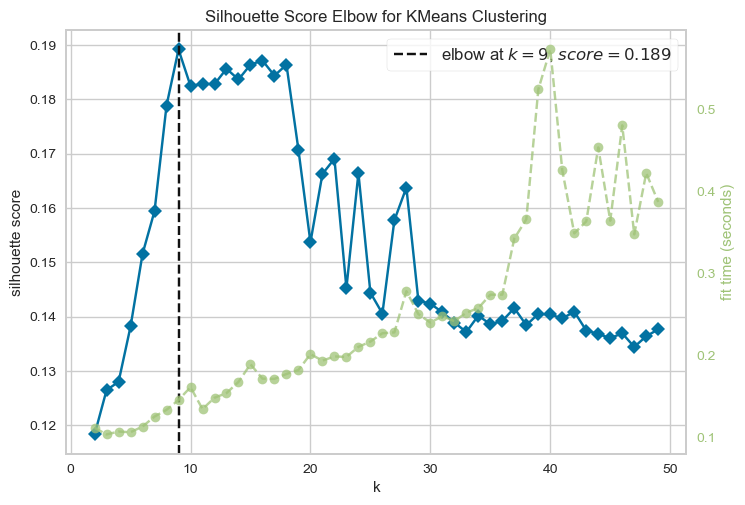

calinski_harabasz


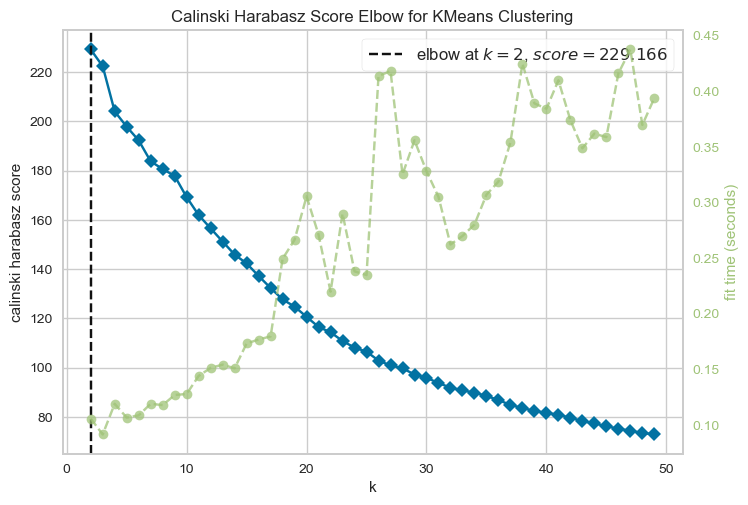

In [170]:
kmeans = KMeans(random_state=42)
methods = ['distortion', 'silhouette', 'calinski_harabasz']
for i in methods:
    print(i)
    visualizer = KElbowVisualizer(kmeans, k=(2,50), metric = i, timings = True)
    visualizer.fit(data)
    visualizer.show() #use to only show
#     visualizer.show(outpath=save_folder+"Mnist_elbow_{}.png".format(i))
#     plt.close()

In [130]:

clusters = np.arange(2,22)
homo = np.zeros((len(clusters),1))
comp = np.zeros((len(clusters),1))
adjust_mut_info= np.zeros((len(clusters),1))
for i,c in tqdm(enumerate(clusters)):
    km = KMeans(n_clusters=c).fit(x)
    homo[i] = homogeneity_score(y,km.predict(x))
    comp [i] = completeness_score(y,km.predict(x))
    adjust_mut_info[i] = ami(y,km.predict(x))
    



20it [00:02,  7.62it/s]


Text(0, 0.5, 'Score')

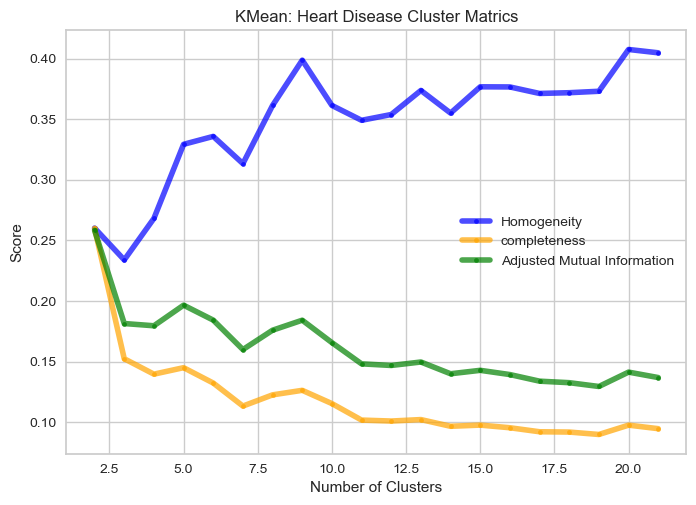

In [132]:
plt.plot(clusters,homo,marker='.', color='blue', linewidth=4, alpha=0.7,label='Homogeneity')
plt.plot(clusters,comp,marker='.', color='orange', linewidth=4, alpha=0.7,label='completeness')
plt.plot(clusters,adjust_mut_info,marker='.', color='green', linewidth=4, alpha=0.7,label='Adjusted Mutual Information')

plt.title("KMean: Heart Disease Cluster Matrics")
plt.legend(loc='best')
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
# plt.savefig(save_folder+"RHC_train_time.pdf")

In [133]:

clusters = np.arange(2,22)
homo = np.zeros((len(clusters),1))
comp = np.zeros((len(clusters),1))
adjust_mut_info= np.zeros((len(clusters),1))
for i,c in tqdm(enumerate(clusters)):
    km = KMeans(n_clusters=c).fit(data)
    homo[i] = homogeneity_score(y_data,km.predict(data))
    comp [i] = completeness_score(y_data,km.predict(data))
    adjust_mut_info[i] = ami(y_data,km.predict(data))
    



20it [00:04,  4.88it/s]


Text(0, 0.5, 'Score')

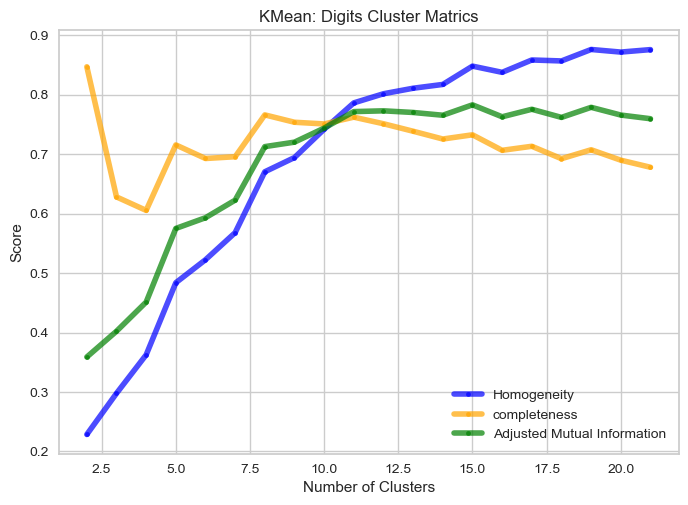

In [135]:
plt.plot(clusters,homo,marker='.', color='blue', linewidth=4, alpha=0.7,label='Homogeneity')
plt.plot(clusters,comp,marker='.', color='orange', linewidth=4, alpha=0.7,label='completeness')
plt.plot(clusters,adjust_mut_info,marker='.', color='green', linewidth=4, alpha=0.7,label='Adjusted Mutual Information')

plt.title("KMean: Digits Cluster Matrics")
plt.legend(loc='best')
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
# plt.savefig(save_folder+"RHC_train_time.pdf")

## EM

In [149]:
from sklearn.base import ClusterMixin
from sklearn.mixture import GaussianMixture

class GaussianMixtureCluster(GaussianMixture, ClusterMixin):
    """Subclass of GaussianMixture to make it a ClusterMixin."""

    def fit(self, X):
        super().fit(X)
        self.labels_ = self.predict(X)
        return self

    def get_params(self, **kwargs):
        output = super().get_params(**kwargs)
        output["n_clusters"] = output.get("n_components", None)
        return output

    def set_params(self, **kwargs):
        kwargs["n_components"] = kwargs.pop("n_clusters", None)
        return super().set_params(**kwargs)


distortion


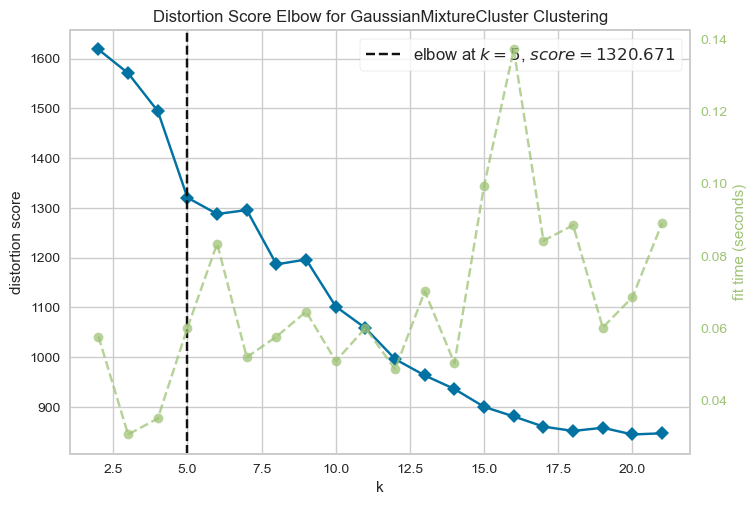

silhouette


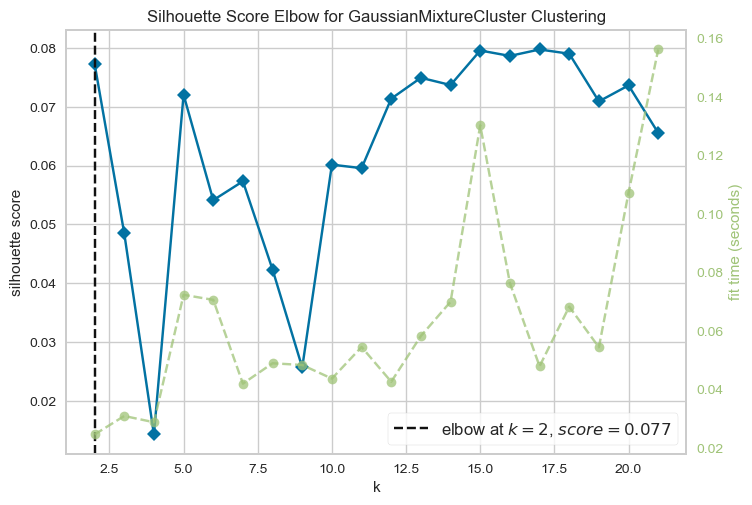

calinski_harabasz


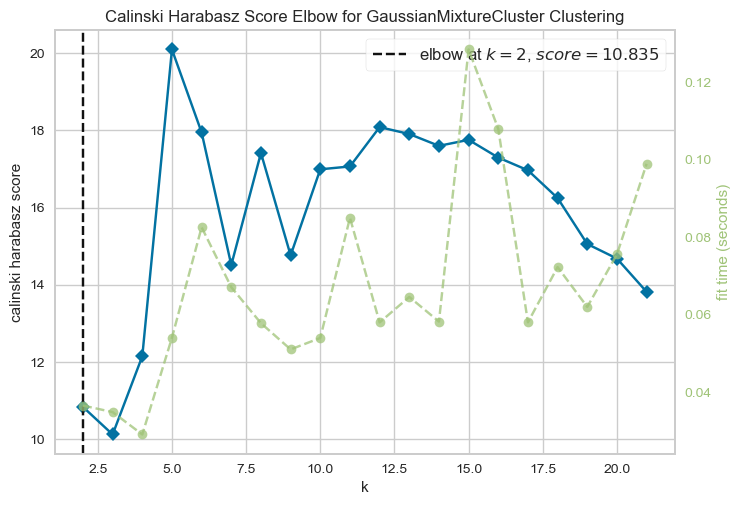

In [159]:

methods = ['distortion', 'silhouette', 'calinski_harabasz']
for i in methods:
    print(i)
    visualizer = KElbowVisualizer(GaussianMixtureCluster(random_state=47), k=(2,22), metric = i, timings = True,force_model=True)
    visualizer.fit(x)
    visualizer.show() #use to only show
    visualizer.show(outpath=save_folder+"EM_heart_elbow_{}.png".format(i))
    plt.close()

distortion


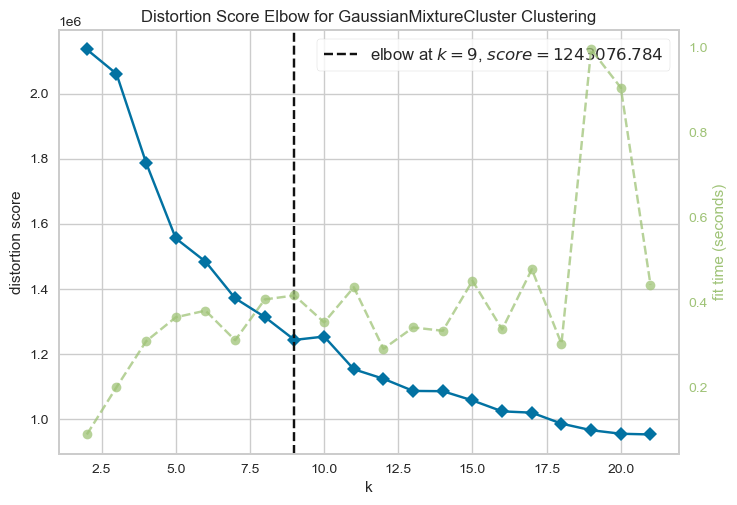

silhouette


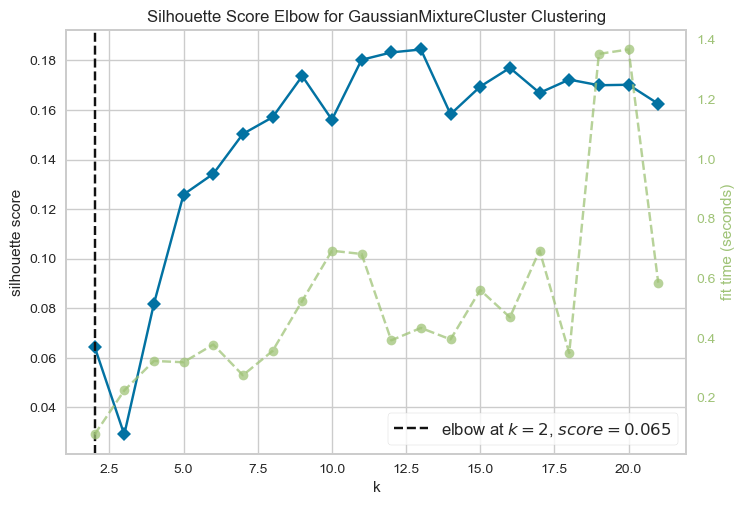

calinski_harabasz


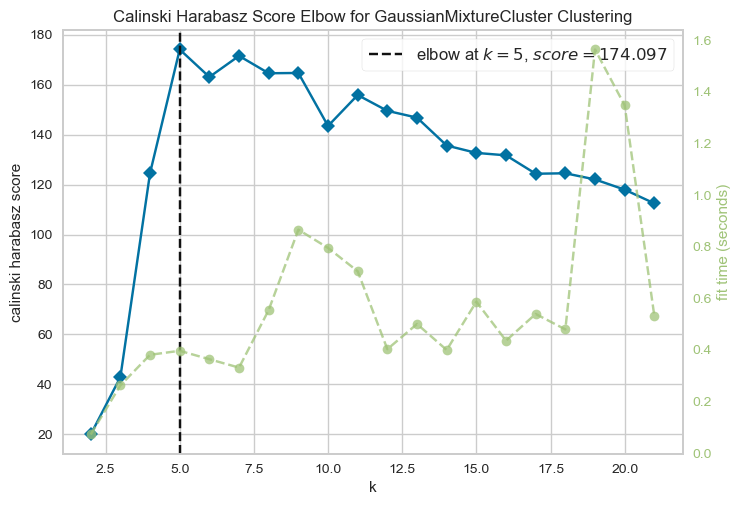

In [161]:

methods = ['distortion', 'silhouette', 'calinski_harabasz']
for i in methods:
    print(i)
    visualizer = KElbowVisualizer(GaussianMixtureCluster(random_state=42), k=(2,22), metric = i, timings = True,force_model=True)
    visualizer.fit(data)
    visualizer.show() #use to only show
    visualizer.show(outpath=save_folder+"EM_digits_elbow_{}.png".format(i))
    plt.close()

In [165]:

clusters = np.arange(2,22)
homo = np.zeros((len(clusters),1))
comp = np.zeros((len(clusters),1))
adjust_mut_info= np.zeros((len(clusters),1))
for i,c in tqdm(enumerate(clusters)):
    gmm = GaussianMixture(n_components=c).fit(x)
    homo[i] = homogeneity_score(y,gmm.predict(x))
    comp [i] = completeness_score(y,gmm.predict(x))
    adjust_mut_info[i] = ami(y,gmm.predict(x))
    



20it [00:01, 13.63it/s]


Text(0, 0.5, 'Score')

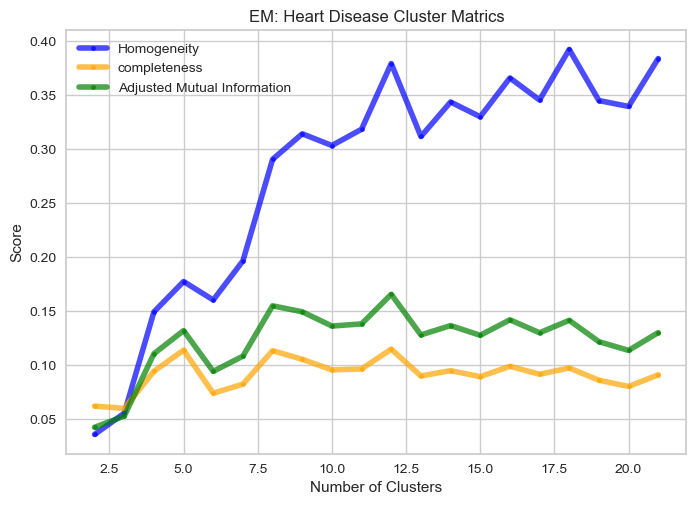

In [166]:
plt.plot(clusters,homo,marker='.', color='blue', linewidth=4, alpha=0.7,label='Homogeneity')
plt.plot(clusters,comp,marker='.', color='orange', linewidth=4, alpha=0.7,label='completeness')
plt.plot(clusters,adjust_mut_info,marker='.', color='green', linewidth=4, alpha=0.7,label='Adjusted Mutual Information')

plt.title("EM: Heart Disease Cluster Matrics")
plt.legend(loc='best')
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
# plt.savefig(save_folder+"RHC_train_time.pdf")

In [168]:
clusters = np.arange(2,22)
homo = np.zeros((len(clusters),1))
comp = np.zeros((len(clusters),1))
adjust_mut_info= np.zeros((len(clusters),1))
for i,c in tqdm(enumerate(clusters)):
    gmm = GaussianMixture(n_components=c).fit(data)
    homo[i] = homogeneity_score(y_data,gmm.predict(data))
    comp [i] = completeness_score(y_data,gmm.predict(data))
    adjust_mut_info[i] = ami(y_data,gmm.predict(data))
    



20it [00:11,  1.71it/s]


Text(0, 0.5, 'Score')

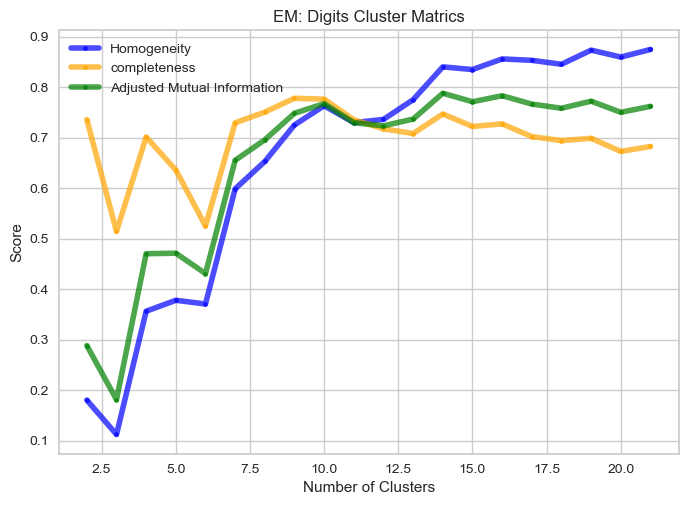

In [169]:
plt.plot(clusters,homo,marker='.', color='blue', linewidth=4, alpha=0.7,label='Homogeneity')
plt.plot(clusters,comp,marker='.', color='orange', linewidth=4, alpha=0.7,label='completeness')
plt.plot(clusters,adjust_mut_info,marker='.', color='green', linewidth=4, alpha=0.7,label='Adjusted Mutual Information')

plt.title("EM: Digits Cluster Matrics")
plt.legend(loc='best')
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
# plt.savefig(save_folder+"RHC_train_time.pdf")